# Exploratory Data Analysis

This notebook focuses on the exploratory analysis of the `Telco Customer Churn` dataset. It aims to uncover initial insights and patterns through visualizations and statistical summaries by understanding feature distributions and examining relationships between features.

**By the end of this notebook, we will have a thorough understanding of the dataset’s characteristics and the interactions between features, setting the stage for effective model development.**

## Loading Tools and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

df = pd.read_csv('../data/clean_telco_churn.csv')
df

,Male,Partner,Dependents,SeniorCitizen,DurationMonths,PhoneService,MultipleLines,NoInternet,DSLInternet,FiberOpticInternet,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyContract,AnnualContract,BiannualContract,AutoBankTransfer,AutoCreditCard,ElectronicCheck,MailedCheck,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,56.95,"1,889.50",0
2,1,0,0,0,2,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,42.30,"1,840.75",0
4,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,0,24,1,1,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,1,1,84.80,"1,990.50",0
7039,0,1,1,0,72,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,1,0,0,1,103.20,"7,362.90",0
7040,0,1,1,0,11,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,29.60,346.45,0
7041,1,1,0,1,4,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,74.40,306.60,1


## Feature Understanding
*Plotting Feature Distributions*
- Histogram
- KDE
- Boxplot

In [2]:
df_internet = df[df['NoInternet'] != 1]


---------------
FEATURE: MALE
---------------


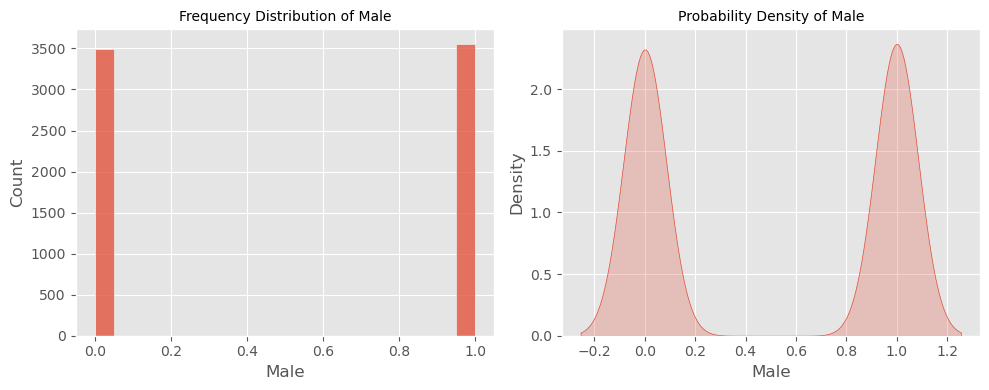


---------------
FEATURE: PARTNER
---------------


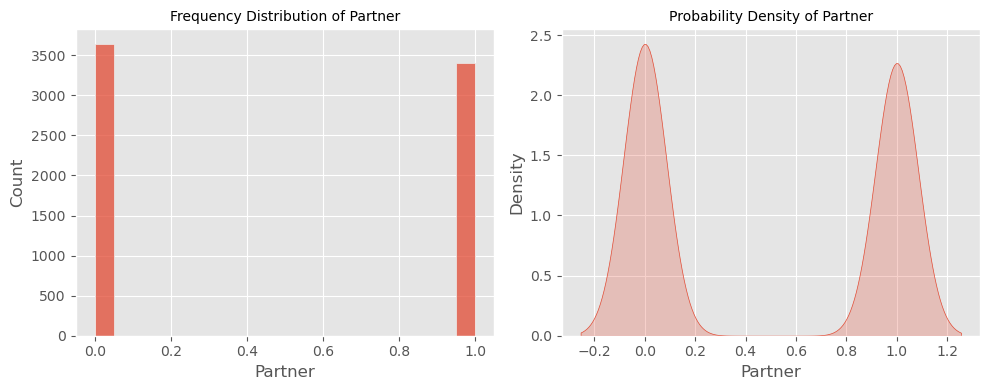


---------------
FEATURE: DEPENDENTS
---------------


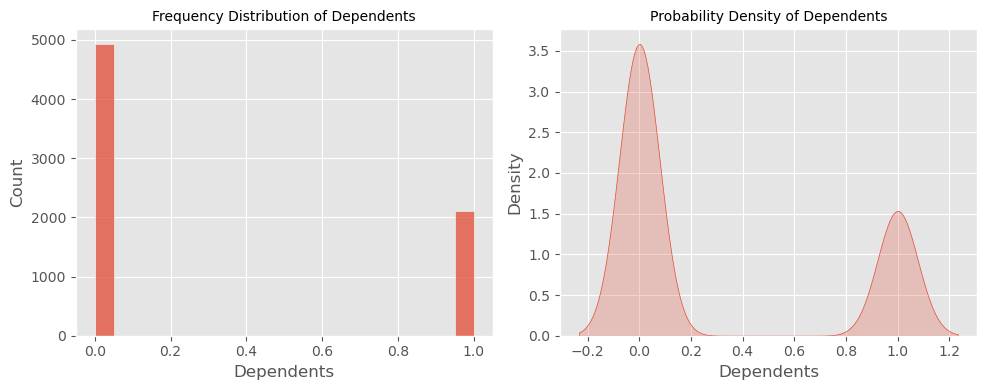


---------------
FEATURE: SENIORCITIZEN
---------------


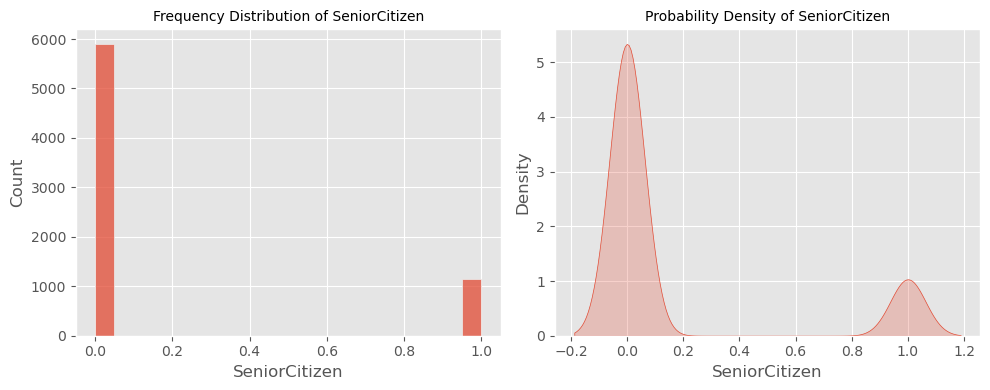


---------------
FEATURE: DURATIONMONTHS
---------------


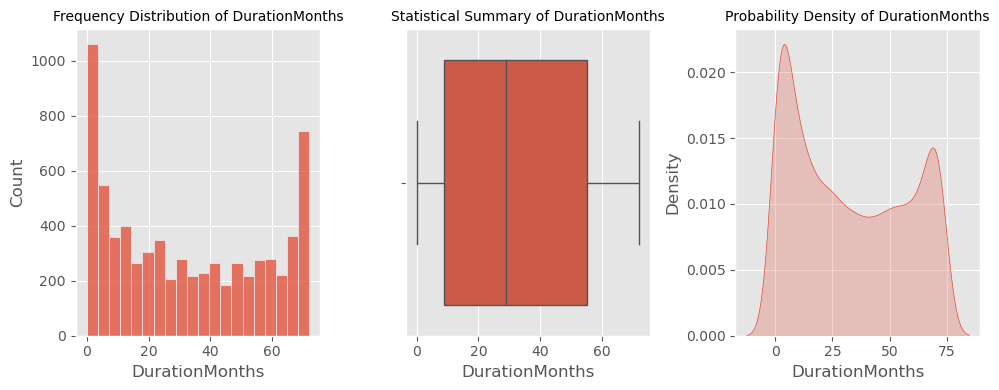


---------------
FEATURE: PHONESERVICE
---------------


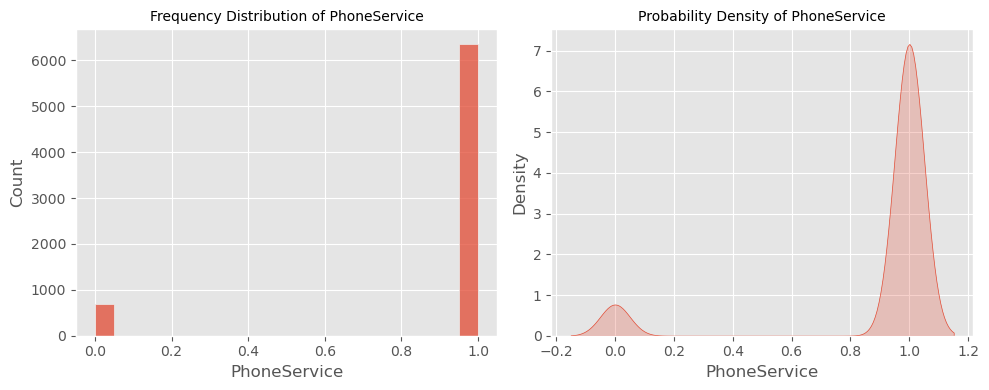


---------------
FEATURE: MULTIPLELINES
---------------


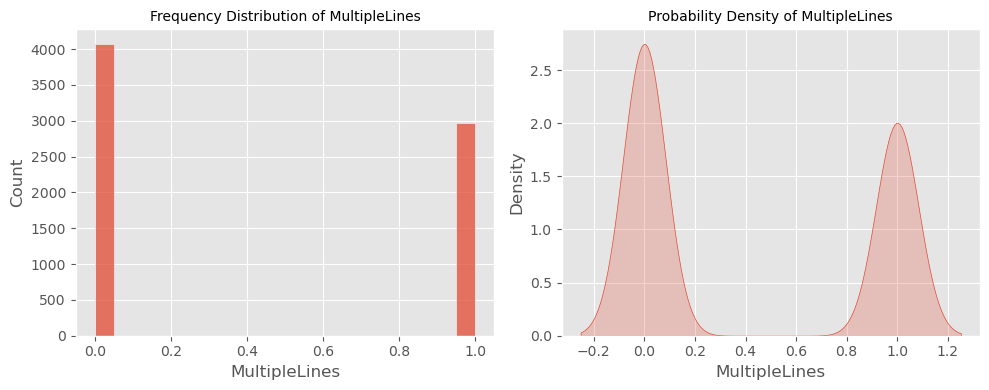


---------------
FEATURE: NOINTERNET
---------------


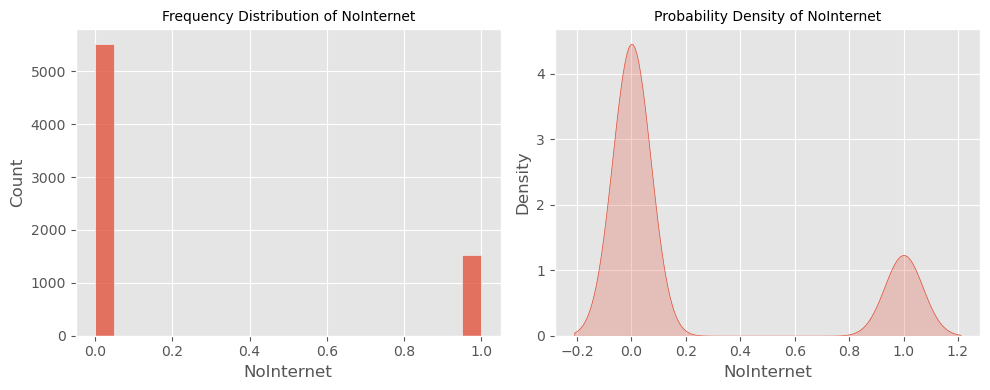


---------------
FEATURE: DSLINTERNET
---------------


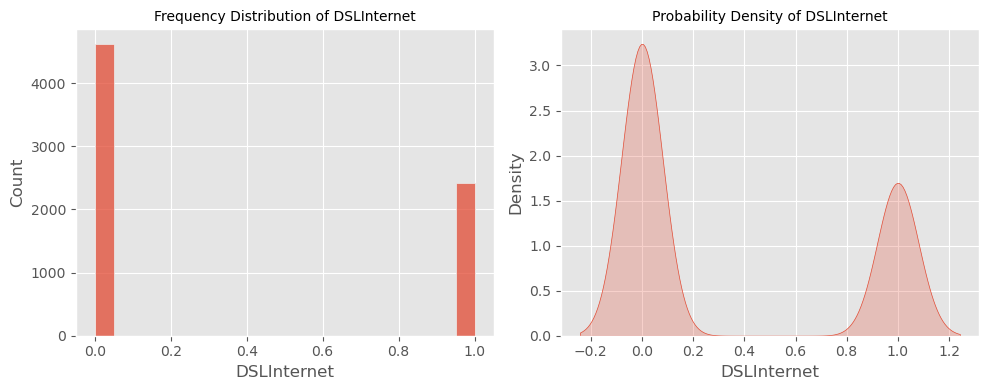


---------------
FEATURE: FIBEROPTICINTERNET
---------------


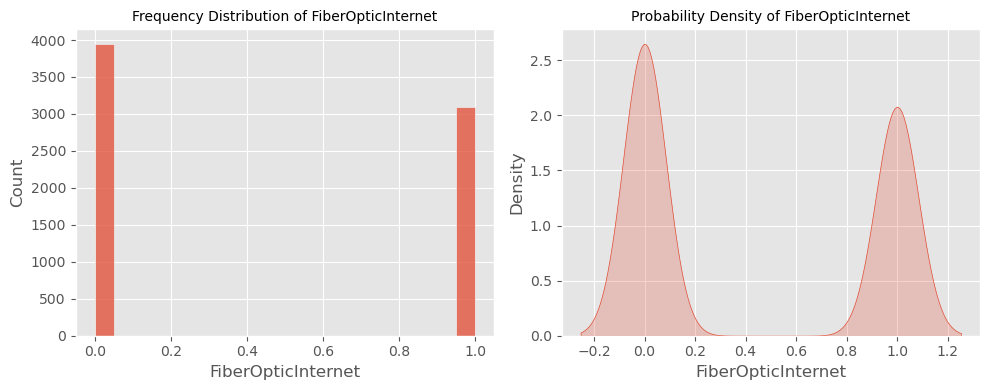


---------------
FEATURE: ONLINESECURITY
---------------


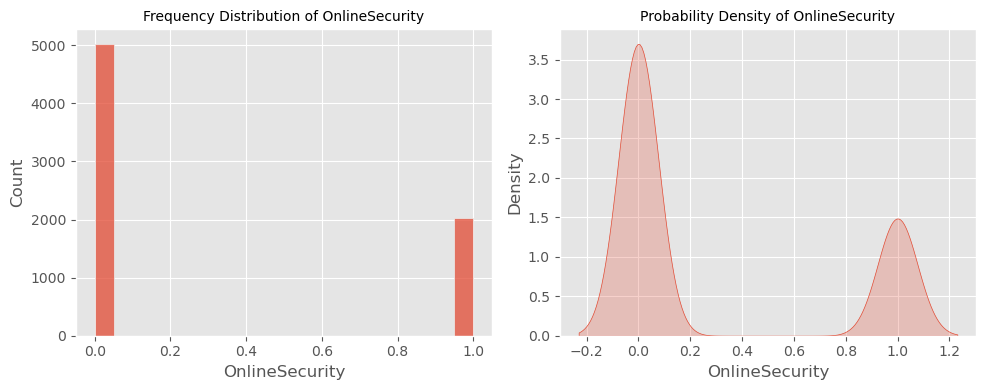


---------------
FEATURE: ONLINEBACKUP
---------------


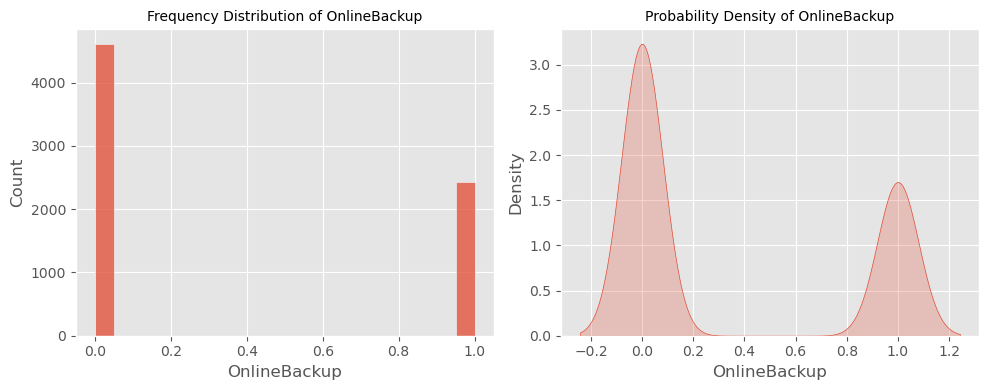


---------------
FEATURE: DEVICEPROTECTION
---------------


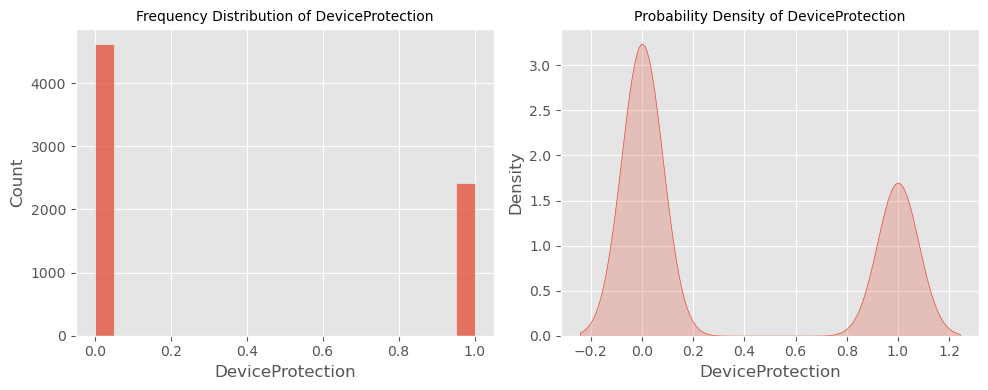


---------------
FEATURE: TECHSUPPORT
---------------


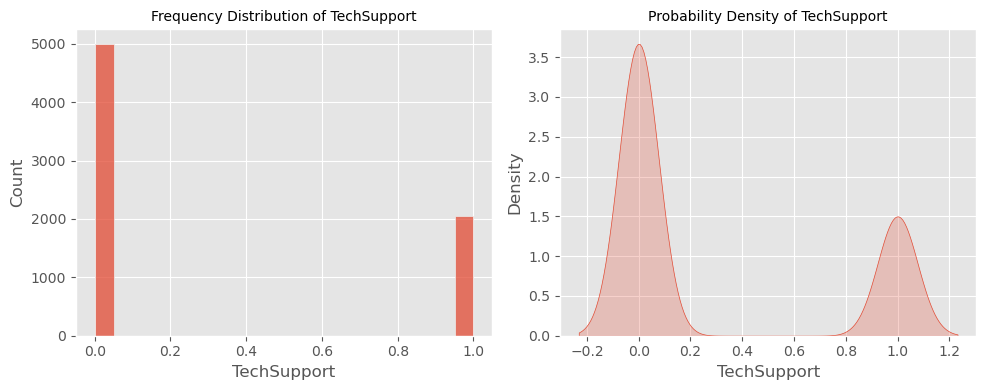


---------------
FEATURE: STREAMINGTV
---------------


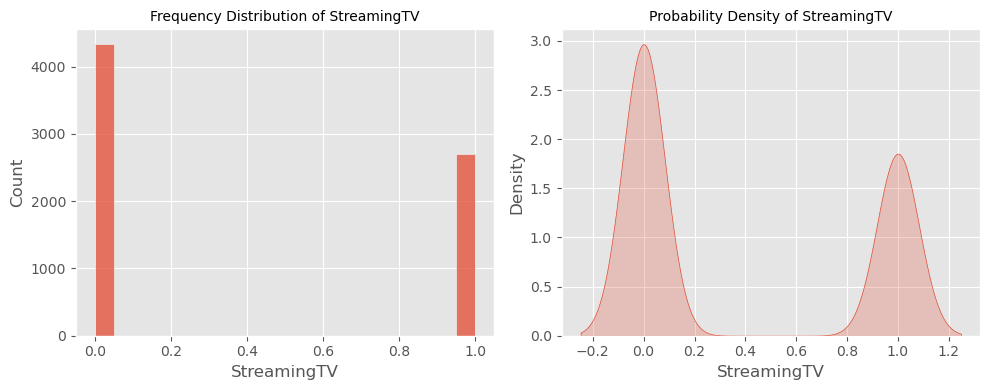


---------------
FEATURE: STREAMINGMOVIES
---------------


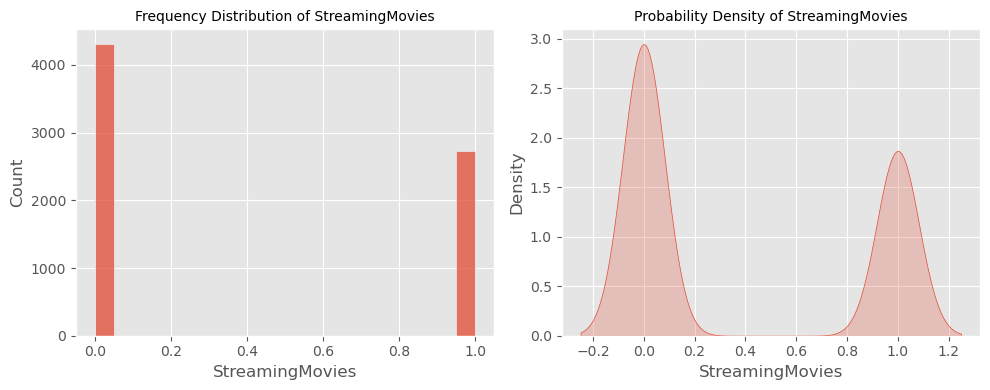


---------------
FEATURE: MONTHLYCONTRACT
---------------


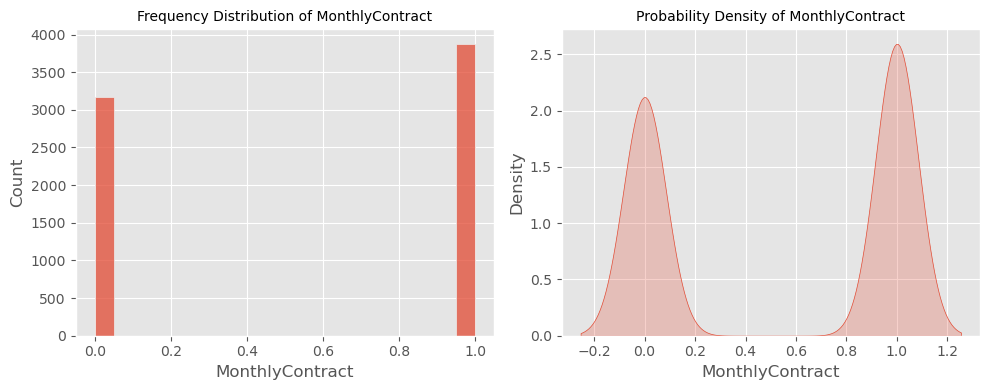


---------------
FEATURE: ANNUALCONTRACT
---------------


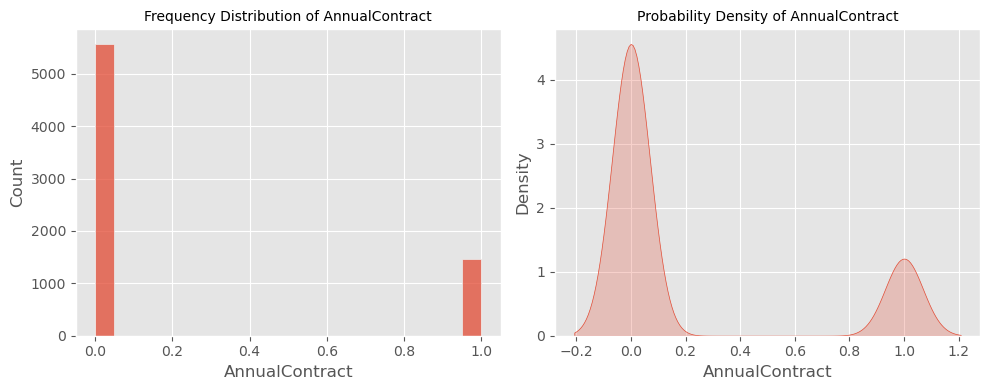


---------------
FEATURE: BIANNUALCONTRACT
---------------


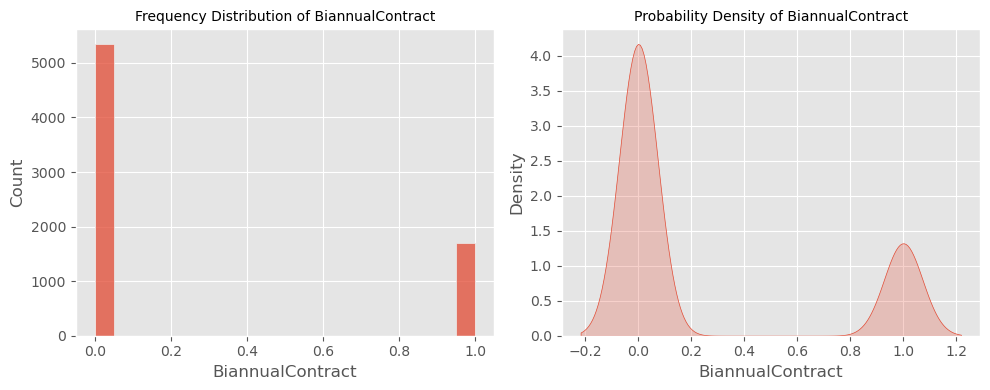


---------------
FEATURE: AUTOBANKTRANSFER
---------------


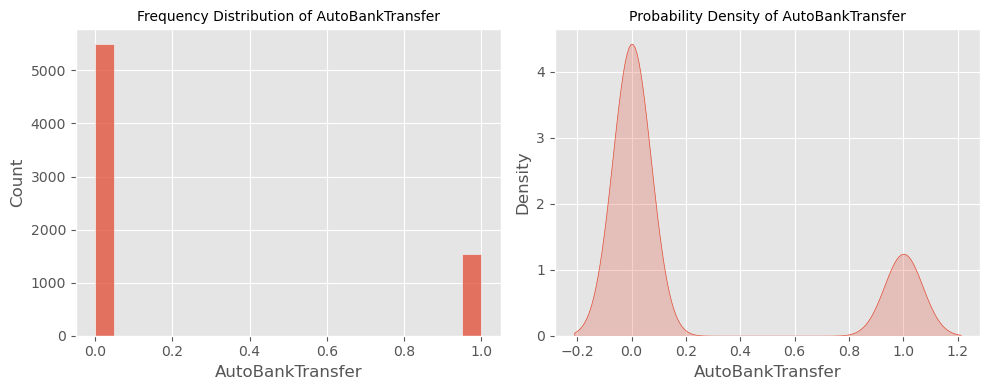


---------------
FEATURE: AUTOCREDITCARD
---------------


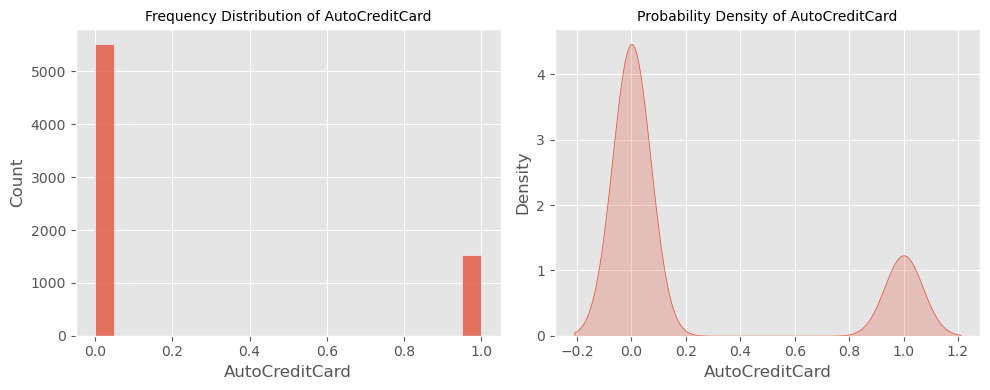


---------------
FEATURE: ELECTRONICCHECK
---------------


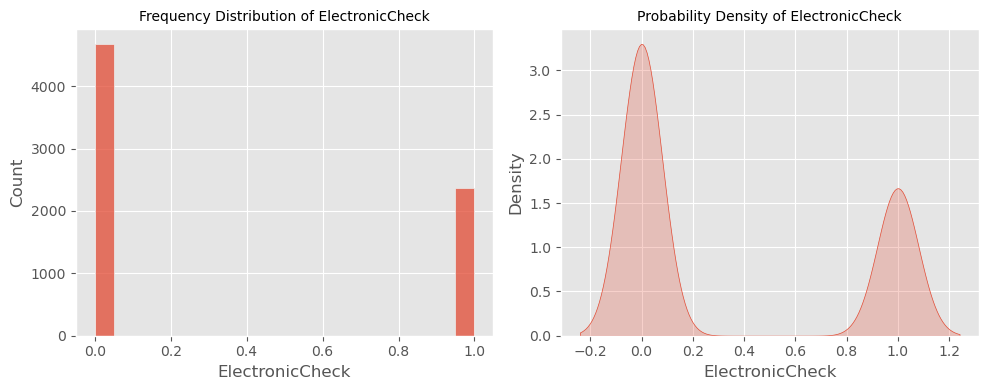


---------------
FEATURE: MAILEDCHECK
---------------


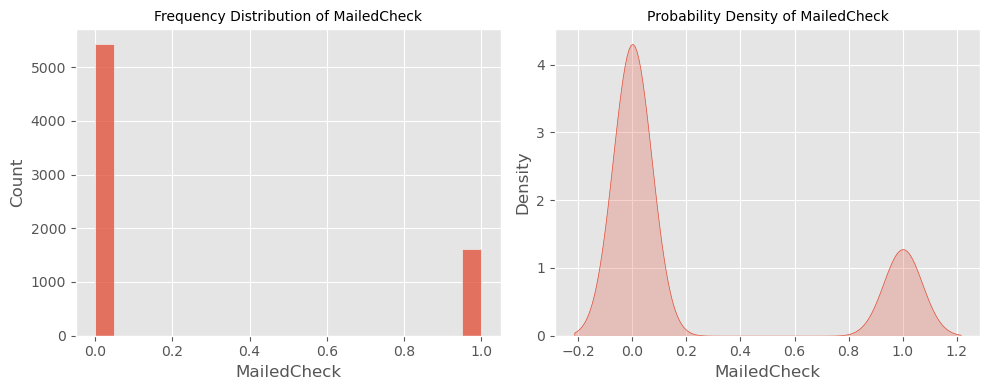


---------------
FEATURE: PAPERLESSBILLING
---------------


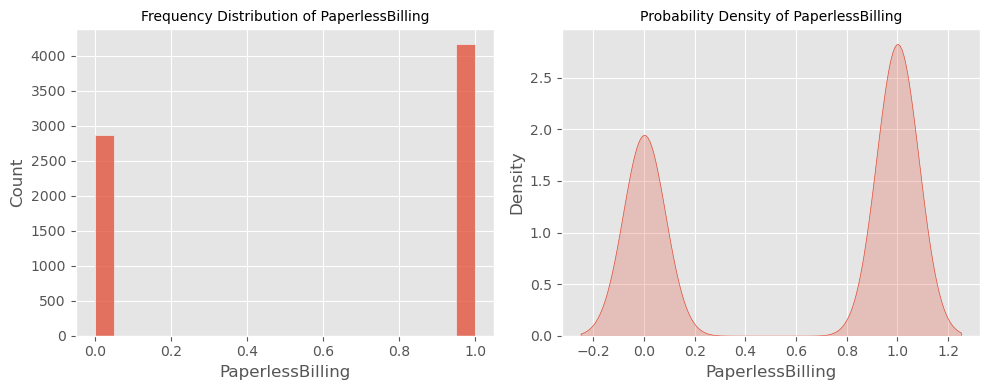


---------------
FEATURE: MONTHLYCHARGES
---------------


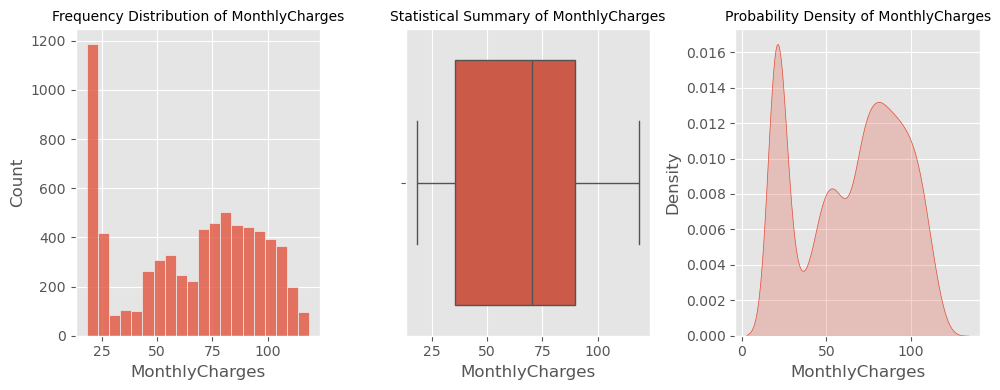


---------------
FEATURE: TOTALCHARGES
---------------


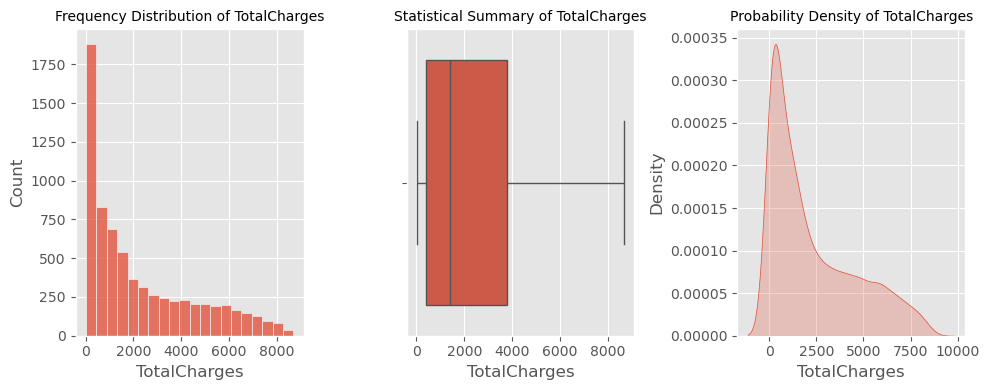


---------------
FEATURE: CHURN
---------------


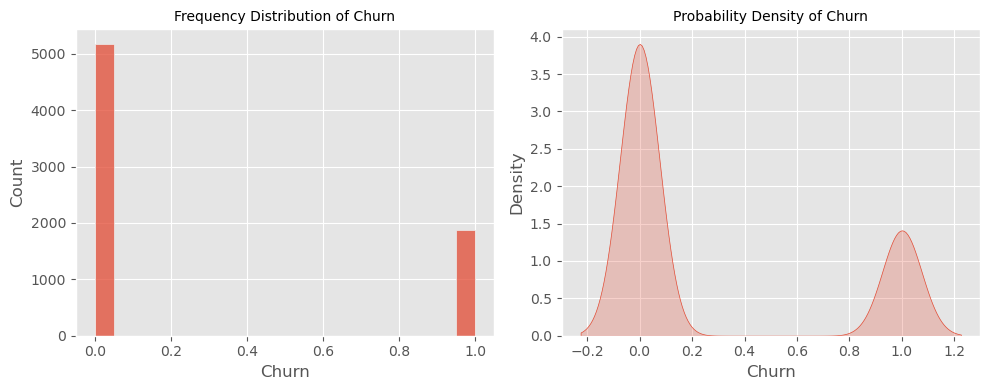

In [3]:
for column in df_internet.columns:
    print()
    print('---------------')
    print(f'FEATURE: {column.upper()}')
    print('---------------')
    if len(df[column].unique()) > 2:
        fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,4))
        sns.histplot(ax=ax1, data=df[column], kde=False, bins=20)
        ax1.set_title(f'Frequency Distribution of {column}', fontsize=10)
        ax1.set_xlabel(column)
        
        sns.boxplot(ax=ax2, x=df[column])
        ax2.set_title(f'Statistical Summary of {column}', fontsize=10)
        ax2.set_xlabel(column)

        sns.kdeplot(ax=ax3, data=df[column], shade=True)
        ax3.set_title(f'Probability Density of {column}', fontsize=10)
        ax3.set_xlabel(column)
        
        plt.tight_layout()
        plt.show()
    else:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
        sns.histplot(ax=ax1, data=df[column], kde=False, bins=20)
        ax1.set_title(f'Frequency Distribution of {column}', fontsize=10)
        ax1.set_xlabel(column)

        sns.kdeplot(ax=ax2, data=df[column], shade=True)
        ax2.set_title(f'Probability Density of {column}', fontsize=10)
        ax2.set_xlabel(column)
        
        plt.tight_layout()
        plt.show()


## Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby Comparisons

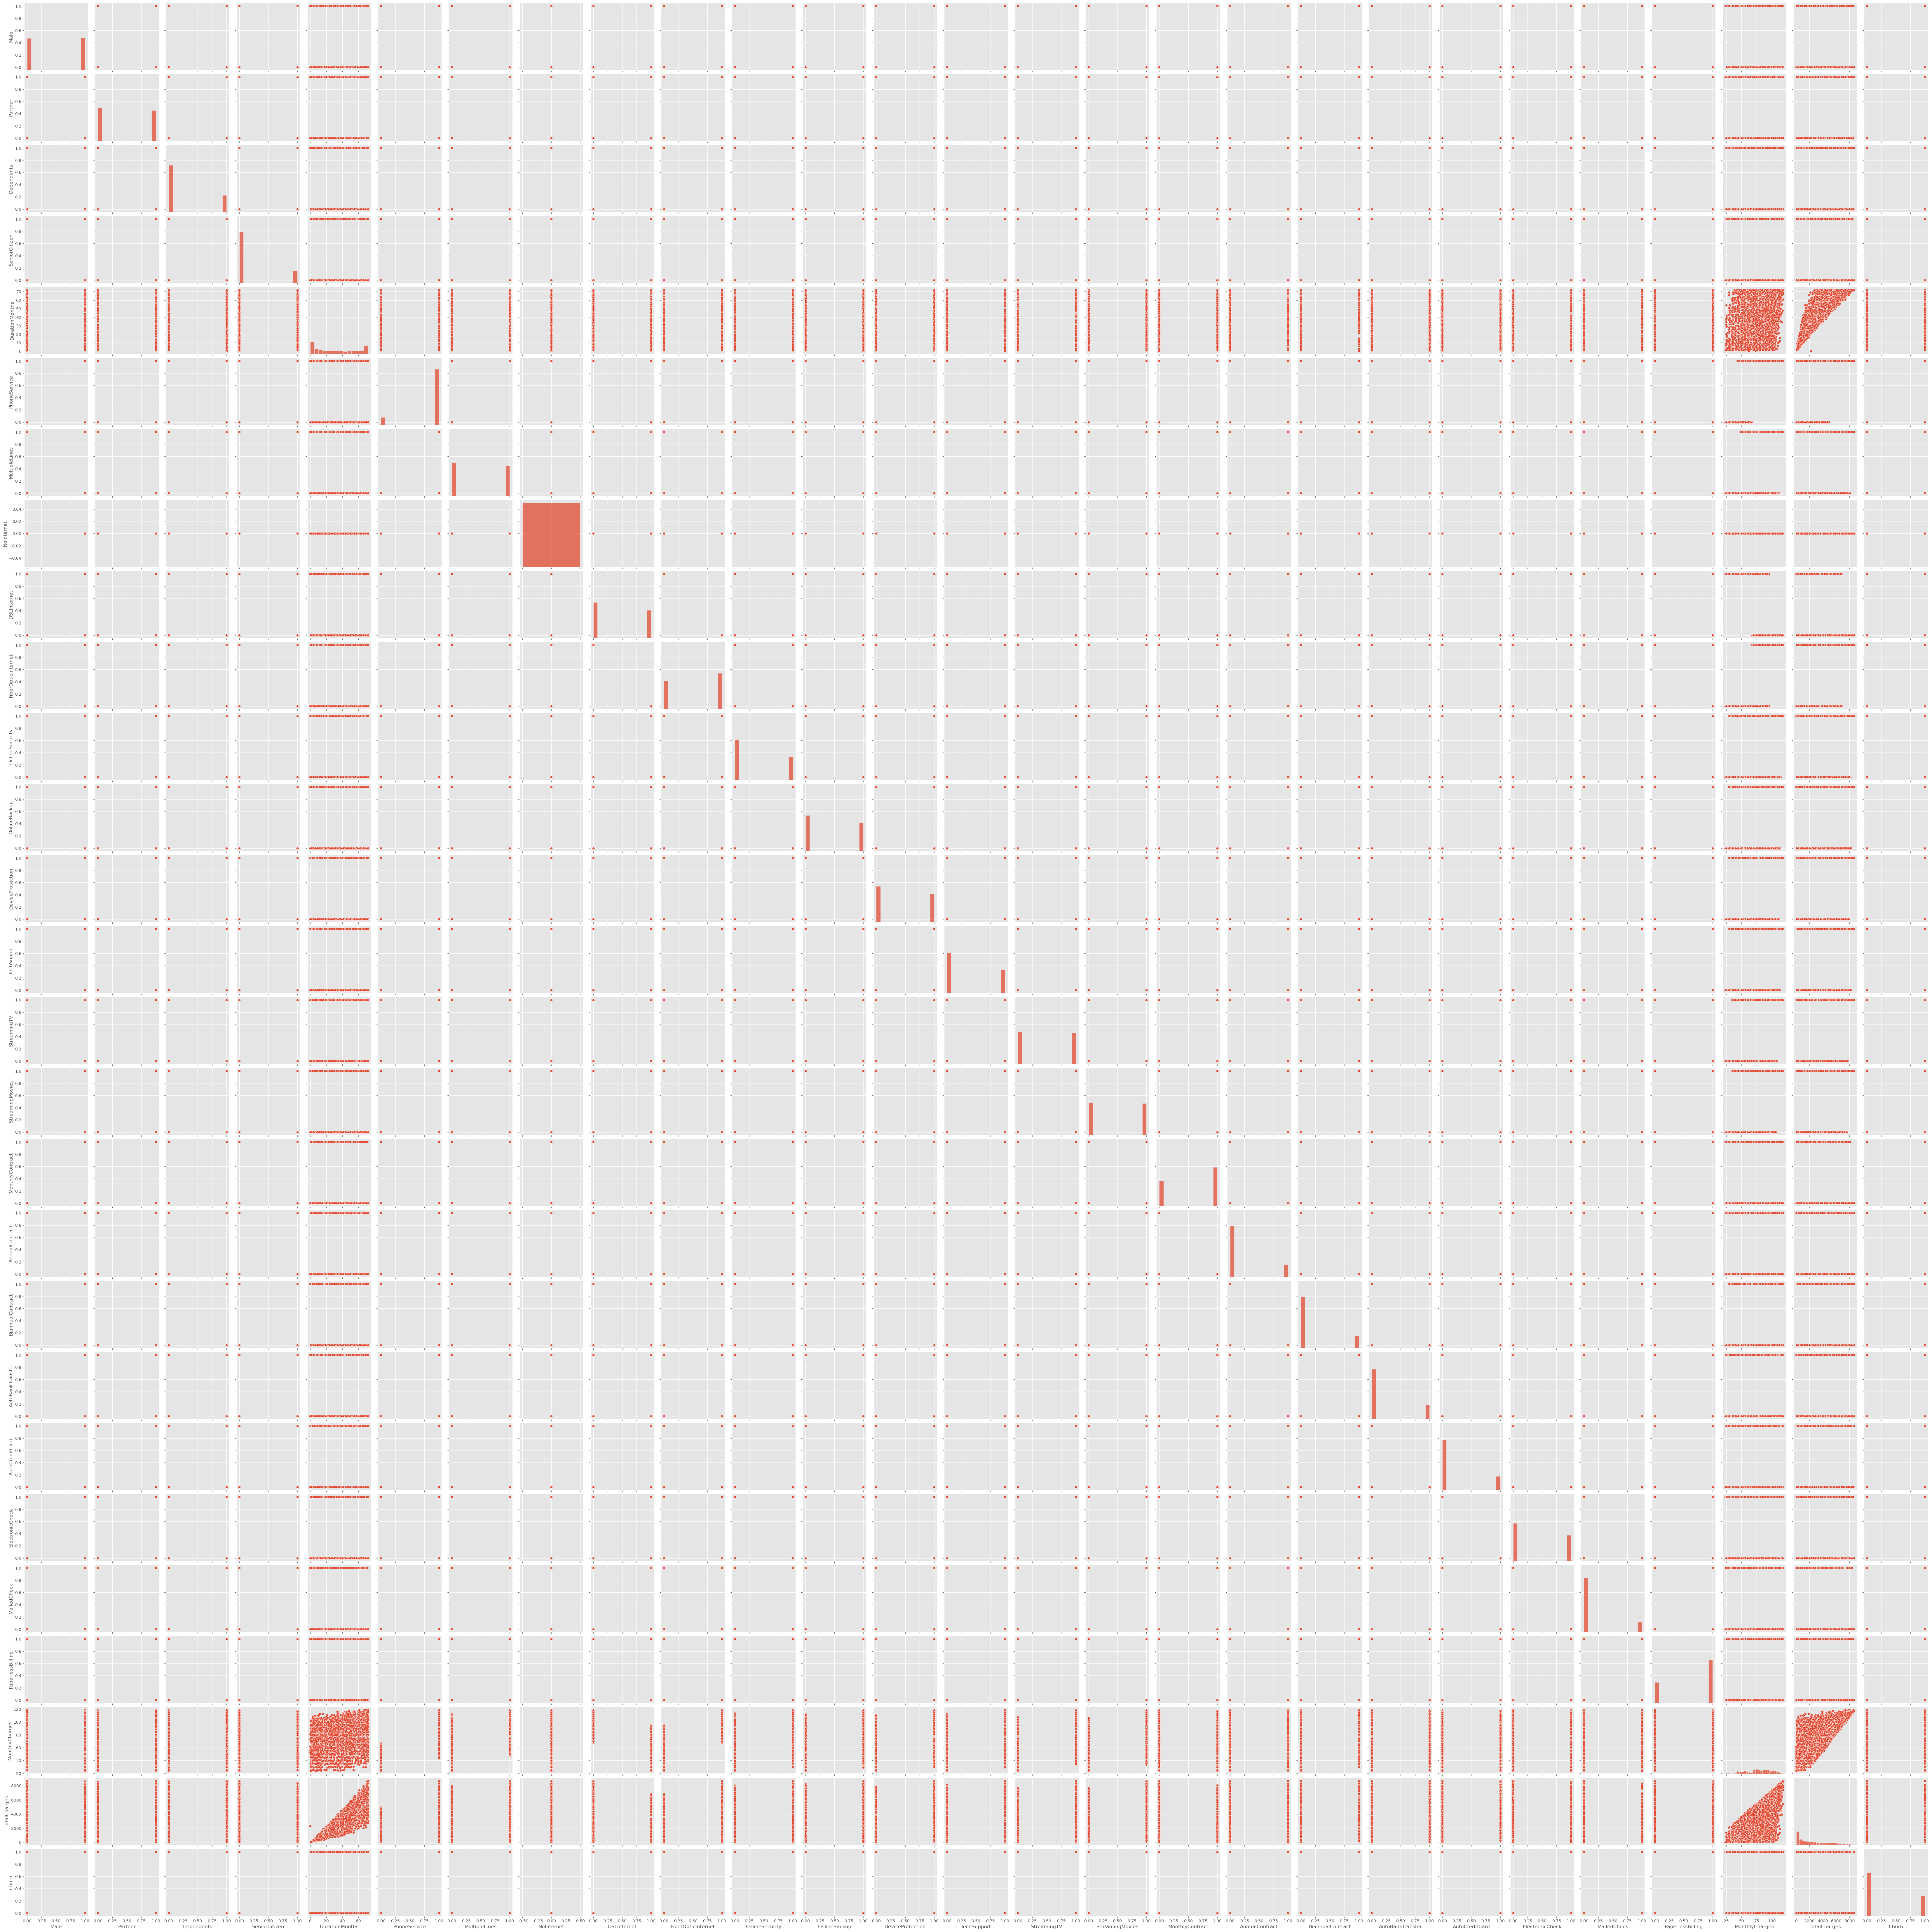

In [4]:
sns.pairplot(data=df_internet)

In [5]:
try:
    print('Script Executed Successfully.')
except:
    print('FAILED')

Script Executed Successfully.
